## Introduction to Language and Speech Technology - REma (RU)
*Seminar 9*

Last update: 2024/11/11

Aditya Kamlesh Parikh - @aditya.parikh@ru.nl


# Lexicons and Language Models

In this tutorial we will take about two major building blocks for an ASR system.


1.   Lexicon
2.   Language Model


First we will discuss about the lexicon.

In lingustics, a Lexicon can be defined as "the complete set of meaningful units in a language." That means a lexicon means a list of words or vocabulary of a language. But in terms of Automatic Speech Recognition (ASR) the meaning of lexicon can be different.

In ASR, a lexicon is indeed a list of words, but it also contains pronunciations for those words. So, it's not just "words"; it’s a word-pronunciation dictionary.

The role of language model (LM) in ASR is to make sure that ASR model forms natural and meaningful sentence from the recognized words.

A LM is a statistical tool that helps predict the probability of a word or sequence of words coming next in a sentence.

# **Goal**:

The first goal is to perform all the steps to create and build a lexicon and after that you will perform all the steps to create a LM. You will be creating a lexicon and a 2-gram language model based on a paragraph provided to you. Below you will be able to see the partial output solution.

Recommended environment/software: Google Colab

# Task 1: Raw data preprocessing

In this exercise, you will preprocess some raw data for building a lexicon and a 2-gram (ARPA and binary format) language model.

You need to:
1. **Clean up** the text by removing any unnecessary symbols or punctuation.
2. **Tokenize** the text into sentences.
3. **Normalize** the text by converting it to lowercase and ensuring no punctuation is present.
4. **Write** the cleaned sentences to a new file called `corpus.txt`, where each line represents a single sentence.
5. **Create a wordlist file** that contains all the unique words occurring in the corpus, one word per line.

The goal is to create a text corpus that is ready for further processing, which involves building a lexicon and a 2-gram language model.

### *Instructions*
- Create two files:
  1. **`corpus.txt`**:
    - Each line should represent a single sentence.
    - All text should be converted to lowercase.
    - All punctuation symbols should be removed.
  2. **`wordlist.txt`**:
    - This file should contain **all the unique words** occurring in the text.
    - Each word should be written **on a separate line**.
    - The words should be **sorted in alphabetical order**.

### *Hints*
- You can use **regular expressions** (`re` module in Python) to find and remove punctuation.
- To create the wordlist, you may consider using python functionality **set** to collect unique words and then **sort** them before writing to the file. This step can be done once you have performed all the steps to create `corpus.txt`
- Don't forget to properly clean up any whitespace (e.g., extra spaces at the beginning or end of sentences).
- Consider using the **NLTK library** to help with tokenizing sentences if needed. (Optional!!)


The corpus is just a five-line small text, as follows:


In [2]:
text = 'Everything we are doing is about going forward,” Phoebe Philo told Vogue in 2009, shortly before showing her debut Resort collection for Céline. Although the label had garnered headlines when it was revived by Michael Kors in the late ’90s, it was Philo who truly brought the till then somewhat somnambulant luxury house to the forefront. Critics credited her with pushing fashion in a new direction, toward a more spare, stripped-down kind of sophistication. What Céline now offered women was, as the magazine put it, “a grown-up and hip way to put themselves together.'

In [36]:
import re

sentence_tokenized_text = text.split(".")

for i in range(len(sentence_tokenized_text)):
    sentence_tokenized_text[i] = sentence_tokenized_text[i].strip().lower()
    sentence_tokenized_text[i] = re.sub("[^\w\d\s-]+", "", sentence_tokenized_text[i])
    
sentence_tokenized_text.pop()

with open("../data/tutorial_9/corpus.txt", "w", encoding="utf-8") as corpus_file_stream:
    for sentence in sentence_tokenized_text:
        corpus_file_stream.write(sentence)
        corpus_file_stream.write("\n")
        
concatenated_processed_text = " ".join(sentence_tokenized_text)
wordlist = sorted(list(set(" ".join(sentence_tokenized_text).split(" ")))) # Terribe one-liner, do NOT do this type of stuff in production lol

with open("../data/tutorial_9/wordlist.txt", "w", encoding="utf-8") as wordlist_file_stream:
    for word in wordlist:
        wordlist_file_stream.write(word)
        wordlist_file_stream.write("\n")

# Task 2: Language Model

In this exercise, you will create a **2-gram (bigram) language model** using the SRILM toolkit. You will work with `corpus.txt` and `wordlist.txt` and generate a bigram ARPA file as output.

1. **Create a bigram language model** from `corpus.txt`.
2. Build the model **with and without** using `wordlist.txt` to see the impact of vocabulary selection.
3. **Modify `wordlist.txt`** (e.g., add or remove words) and observe the effect on the language model.
4. Explore the behavior and function of the **`<unk>` token**, which represents words not present in the vocabulary.
5. Understand how to calculate the **probabilities of individual words** and **bigrams** in the model.

### Key Concepts
- **`<unk>` Token**: Used for unknown words that aren't included in the vocabulary.
- **Probability Calculations**: Learn how the likelihoods of words and bigrams are determined in the language model.

### **Resources**
- You can learn more about creating language models and the `<unk>` token by following this blog: https://radbouduniversiteit-my.sharepoint.com/:b:/g/personal/aditya_parikh_ru_nl/Ef7jDtVtGc1DgbqWagCcWX0BQWWCHrvudqMPh2PwzLIbDg?e=Qm6uMh

- Another important resource: https://web.stanford.edu/~jurafsky/slp3/3.pdf


But first:
Install SRILM in Colab.

*   Step 1: First visit the SRILM website and download SRILM.   http://www.speech.sri.com/projects/srilm/download.html
*   Step 2: SRILM zip folder is downloaded in your personal laptop, you just need to do drag and drop the zip file to Google Colab files. Or just upload the folder to Google Colab files.


Now follow below commands to install SRILM.

In [ ]:
! rm -rf content/srilm

In [ ]:
! mkdir /content/srilm #make a new directory for SRILM
! mv srilm-1.7.3.tar.gz /content/srilm #Move SRILM zipped folder to newly created directory
! cd /content/srilm && tar -xvf srilm-1.7.3.tar.gz #Unzip the folder

***This step is very important for installation***

Now open the `Makefile` located here: `/content/srilm/Makefile` and uncomment the SRILM folder location and change the location to `/content/srilm`.

If you can not understand here, then follow this blog: https://hovinh.github.io/blog/2016-04-22-install-srilm-ubuntu/ or this YouTube video: https://youtu.be/bd_m5BU2oSc?si=xmhStO-UXs0NaT1b (In Hindi language, but you can follow the commands)

Finally, run the command below.

In [ ]:
! cd /content/srilm && make

And that's it. SRILM installation will begin.

Now here are some commands you need to follow to generate a 2-gram language model.

In [ ]:
# Command 1
! /content/srilm/bin/i686-m64/ngram-count -text corpus.txt -order 2 -unk -map-unk "<UNK>" -interpolate -lm lm.arpa

`corpus.txt` is file which contains the text processed in previous exercise after cleaning up, tokenizing and, normalizing it and lm.arpa is the output of the command (the LM).

In [ ]:
# Command 2
# Build 2-gram Language Model with Vocabulary Limitations
! /content/srilm/bin/i686-m64/ngram-count -text corpus.txt -order 2 -limit-vocab -unk -vocab wordlist.txt -lm lm.arpa

This creates a 2-gram language model (`lm.arpa`) from `corpus.txt` while limiting the vocabulary based on wordlist.txt and treating out-of-vocabulary words as `<unk>`.

Did you know that...?

Combining multiple language models is done to leverage the strengths of each model, which can be helpful for domain adaptation, leading to better overall performance across varied contexts. This also improves the robustness of the language model, resulting in better performance on previously unseen text.

Take any small paragraph and make a language model and try to combine it with the first language model. Use below command for it.

In [ ]:
# Command to combine two language models.
! /content/srilm/bin/i686-m64/ngram -order 2 -lm lm1.arpa -mix-lm lm2.arpa -lambda 0.5 -write-lm lm_combined.arpa

This merges two language models (`lm1.arpa` and `lm2.arpa`) with a mixing weight `lambda` of 0.5 to produce `lm_combined.arpa`.

Can you combine more than 2 language models?

You can learn more SRILM commands from here: http://www.speech.sri.com/projects/srilm/manpages/ngram.1.html

Play with different commands.

Binary format of LM

While working with Wav2vec 2.0 ASR models, you can also integrate LM with end-to-end ASR models. For that, you may need an LM in binray format. You can easily convert it, with the help of toolkit named KENLM (named by it's creator: Kenneth Heafield, just another language modelling toolkit) Using the binary format significantly reduces loading time. It also exposes more configuration options. The build_binary program converts ARPA files to binary files:


But before doing that, you need to download and install KENLM. You can download and install with this below command.

In [ ]:
%%capture ts
!pip -q install https://github.com/kpu/kenlm/archive/master.zip pyctcdecode
! sudo apt -y install build-essential cmake libboost-system-dev libboost-thread-dev libboost-program-options-dev libboost-test-dev libeigen3-dev zlib1g-dev libbz2-dev liblzma-dev
! wget -O - https://kheafield.com/code/kenlm.tar.gz | tar xz
! mkdir kenlm/build && cd kenlm/build && cmake .. && make -j2
! ls kenlm/build/bin

But also don't forget to check out the documentation of KenLM.
https://kheafield.com/code/kenlm/ and https://github.com/kpu/kenlm

Once you installed it, you can convert ARPA to binary LM with the help of below command.

In [ ]:
! kenlm/build/bin/build_binary text.arpa text.binary

The last task of this tutorial is about creating a lexicon file.
# Grapheme-to-Phoneme (G2P) Conversion

In the previous exercise you created `wordlist.txt` file. Now we will obtain phonetic transcriptions for the words listed in `words.txt` using the CLARIN G2P tool (https://clarin.phonetik.uni-muenchen.de/BASWebServices/interface/Grapheme2Phoneme). We will prepare a final file, `corpus.pron.txt`, which combines each word with its phonetic transcription.

### Steps

#### 1. Upload `words.txt` to the CLARIN G2P Tool

1. Go to the CLARIN G2P tool web service.
2. Drag & drop the `words.txt` file into the designated upload area.
3. Accept the terms of usage by checking the required checkbox.
4. In the output options, select:
   - **Output format**: `.txt`
   - **Phonetic alphabet**: `SAMPA`
   - **Language**: `English (US)`
5. Click on **Upload** to process the file.

#### 2. Download the Transcription File

- After processing, download the resulting file. It will be named `words.g2p.txt`.

#### 3. Combine Words with Phonetic Transcriptions

Use the Python code below to combine `words.txt` and `words.g2p.txt` into the final file, `corpus.pron.txt`.

The content of this file must contain the following format:  

`<word>\t<phonetic_transcription>\n`

`everything	E v R i: T I N `




### *Task 3: Lexicon creation*
Find at least three online G2P tools (any language) and make use of them with simple examples. Describe their advantages and disadvantages.

# Appendix 1

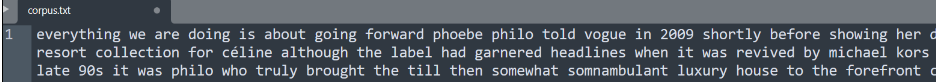

Figure 1: Extract of the corpus.txt file  



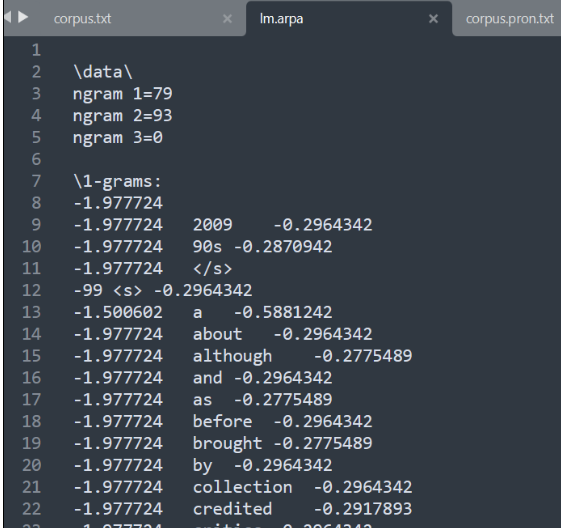

Figure 2: Extract of the lm.arpa file

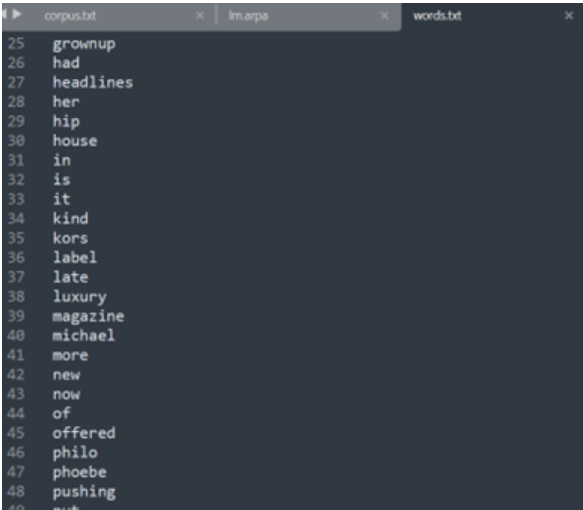

Figure3: Extract of the words.txt file

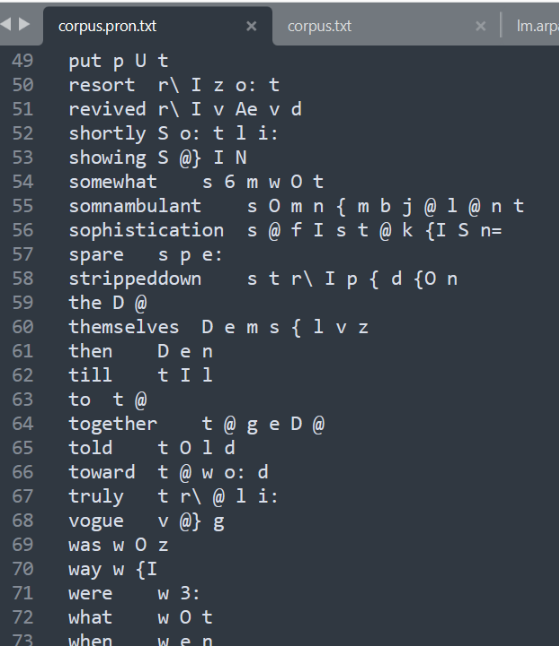

Figure 4: Extract of the corpus.pron.txt file